In [9]:
#Prerequisite
#import sys
#!{sys.executable} -m pip install tweepy
#!{sys.executable} -m pip install pymongo
#Above code is for running for the first time. Uncomment and execute them

In [10]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [27]:
api_key = "pCRLPdf2lkjpRX9Uczpt2gVBb" # <---- Add your API Key
api_secret = "G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD" # <---- Add your API Secret
access_token = "100875722-ZCFQUY8B7OOAgVb3bDrgwUdLc3r5PEaeNl1dgNqc" # <---- Add your access token
access_token_secret = "nwYOTVCY59yXx12iveDeShAHolH0zAcKF87jg2Q2ESLZy" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["indianelection"]["narendramodi"]
col.count()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


0

In [28]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["Narendra Modi",
            "GoBackModi",
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 1:01:26.773298
Tweets/Sec: 1.4
Tweets collected: 5000
Total tweets in collection: 5000


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [29]:
col.find_one()

{'_id': ObjectId('5c610fa5d494741a18de417b'),
 'created_at': 'Mon Feb 11 06:01:04 +0000 2019',
 'id': 1094838711827812352,
 'id_str': '1094838711827812352',
 'text': 'Narendra modi ji',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1094836169844625409,
  'id_str': '1094836169844625409',
  'name': 'Kaushinder Foji',
  'screen_name': 'KaushinderF',
  'location': None,
  'url': None,
  'description': 'my Police n mara gao mara Ankil ka sath mara peta no halp police plzz halp me',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 1,
  'friends_count': 3,
  'listed_count': 0,
  'favourites_count': 0,
  'statuses_count': 3,
  'created_at': 'Mon Feb 11 05:50:58 +0000 2019',
  'utc_offset': None,
  '

In [30]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,lang,source,text,user
0,Mon Feb 11 06:01:04 +0000 2019,in,"<a href=""http://twitter.com/download/android"" ...",Narendra modi ji,@KaushinderF
1,Mon Feb 11 06:01:04 +0000 2019,et,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @csharitha: This is your ignorance. Telugu ...,@iamnone108
2,Mon Feb 11 06:01:06 +0000 2019,en,"<a href=""http://twitter.com/download/android"" ...",RT @umakantsingh_IN: Bird....Plane.... Train 1...,@NavyaBRaj1
3,Mon Feb 11 06:01:07 +0000 2019,hi,"<a href=""http://twitter.com/download/android"" ...",@RahulGandhi ✍️2019 में दो बड़ी फिल्मे आ रही ह...,@pusham_nitesh
4,Mon Feb 11 06:01:07 +0000 2019,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @rose_k01: No one Trolls like NaMo 😂😂 👏👏👏 O...,@SushmaM17329022
5,Mon Feb 11 06:01:07 +0000 2019,und,"<a href=""http://twitter.com/download/iphone"" r...",RT @Hunimanikanta: @ncbn #APWITHCBN \n#TDP \n#...,@Chakrad96741087
6,Mon Feb 11 06:01:08 +0000 2019,en,"<a href=""http://twitter.com/download/android"" ...",Thanks for sending Modi to Delhi again😀😀😀,@SanjayKashyap84
7,Mon Feb 11 06:01:09 +0000 2019,en,"<a href=""https://about.twitter.com/products/tw...","🅿🅱\n\n▶ Today , #Hon.PM #Narendra #Modi is abo...",@BazaarChennai
8,Mon Feb 11 06:01:09 +0000 2019,ta,"<a href=""http://twitter.com/download/iphone"" r...",RT @RABSBB: திருப்பூர் நெசவு மற்றும் ஜவுளி தொழ...,@AimlMubarak
9,Mon Feb 11 06:01:10 +0000 2019,ta,"<a href=""http://twitter.com/download/android"" ...",RT @GuyFawkes_____: 5. இந்திய வரலாற்றில் எம்.எ...,@MK_Dec26


In [31]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,4259
1,the,1776
2,modi,1660
3,https,1595
4,co,1539
5,to,1508
6,narendra,1097
7,of,1068
8,gobackmodi,1011
9,is,1007


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


mitronapp                 3
Mobile Web (M2)           3
IFTTT                    14
Facebook                 28
Twitter for iPad         30
TweetDeck                64
Twitter Web App         347
Twitter Web Client      472
Twitter for iPhone      503
Twitter for Android    3506
Name: source, dtype: int64

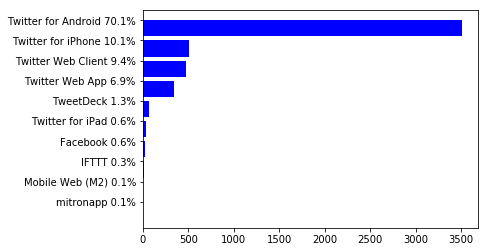

In [32]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

mr       20
tr       28
et       47
in       57
kn       60
te      185
und     213
ta      466
hi      689
en     3152
Name: lang, dtype: int64

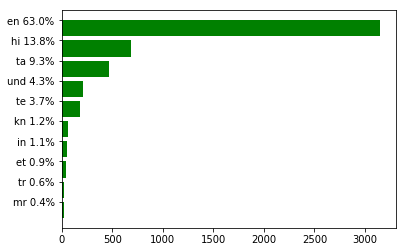

In [33]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [34]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [35]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,lang,text
2,1094838720749096961,en,RT @umakantsingh_IN: Bird....Plane.... Train 1...
4,1094838723651489792,en,RT @rose_k01: No one Trolls like NaMo 😂😂 👏👏👏 O...
6,1094838727422210050,en,Thanks for sending Modi to Delhi again😀😀😀
7,1094838730437709824,en,"🅿🅱\n\n▶ Today , #Hon.PM #Narendra #Modi is abo..."
10,1094838735152316417,en,"RT @arvinth_e: Massive crowd, I was told 1000s..."
11,1094838735588315136,en,RT @Mlakcreddy: For wt u support? \n#GoBackMod...
12,1094838736318287873,en,RT @TajinderBagga: Yes. Go Back Modi to Presi...
13,1094838743415078912,en,RT @umakantsingh_IN: Bird....Plane.... Train 1...
15,1094838752537538561,en,"Thank you PM Narendra Modi, You Have Done It h..."
16,1094838754412441600,en,"🅿🅱\n\n▶ Today , #Hon.PM #Narendra #Modi is abo..."


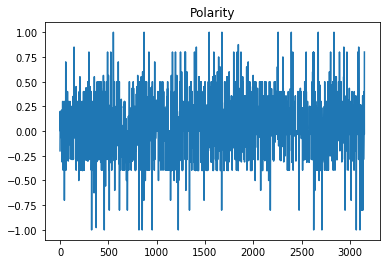

In [36]:
from  textblob import TextBlob
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

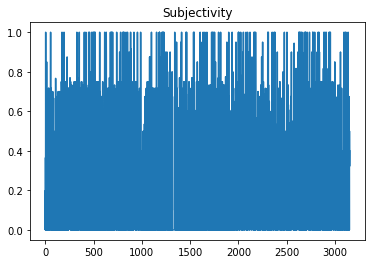

In [37]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [38]:
import statistics
statistics.mean(poltweet.polarity)

0.02836048944049817

In [39]:
import statistics
statistics.mean(poltweet.subjectivity)

0.31274408435790096